In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import mpld3
import numpy as np
from scipy.stats import stats

In [2]:
State = "CleanedState.csv"
Obesity2 = "CleanedObesity2014.csv"
States="States.csv"
Obesity = pd.read_csv(Obesity2)
Mortality = pd.read_csv(State)
StateAb=pd.read_csv(States)




In [4]:
Mortality2 = Mortality.loc[Mortality["Year"]==2014]
Mortality2.head()
Mortality3 = Mortality2["Mortality"]
Obesity3=Obesity["Adult Obesity Rate 2014"]
Combined=pd.merge(Obesity,Mortality2, on= "State", how = "left")
Combined2 = pd.merge(Combined,StateAb, on="State",how="left")
Combined2.to_csv("ObesityMortalityStateData.csv")
Combined2

,State,Adult Obesity Rate 2014,Year,Mortality,State Ab
0,Alaska,29.7,2014,217.01,AK
1,North Carolina,29.7,2014,255.06,NC
2,Alabama,33.5,2014,310.59,AL
3,North Dakota,32.2,2014,233.41,ND
4,Arkansas,35.9,2014,324.15,AR
5,Nebraska,30.2,2014,227.75,NE
6,Arizona,28.9,2014,209.33,AZ
7,New Hampshire,27.4,2014,220.47,NH
8,California,24.7,2014,221.94,CA
9,New Jersey,26.9,2014,248.78,NJ


Text(0.5, 1.0, 'Comparing Obesity and Mortality Rates in Adults in 2014')

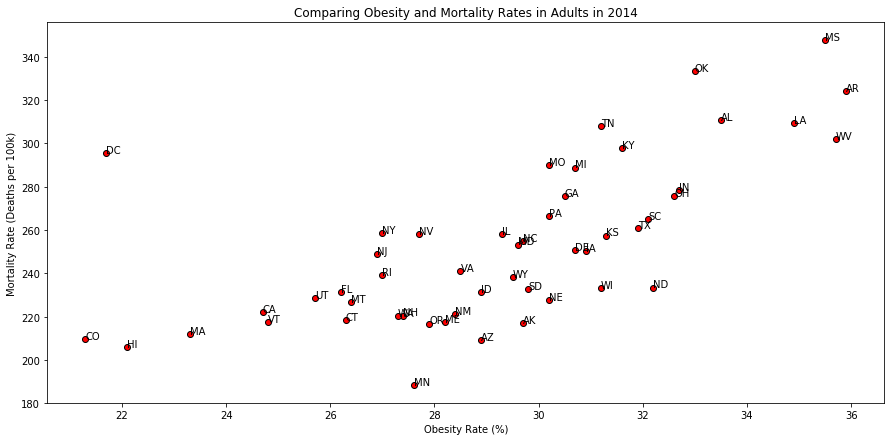

In [13]:
y = Combined["Mortality"]
z = Combined["Adult Obesity Rate 2014"]
n = Combined2["State Ab"]
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(z,y,facecolor="red",edgecolor="black")
for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))
plt.xlabel("Obesity Rate (%)")
plt.ylabel("Mortality Rate (Deaths per 100k)")
plt.title("Comparing Obesity and Mortality Rates in Adults in 2014")

The P-Value is 4.048654382765291e-08
0.46248147559827923


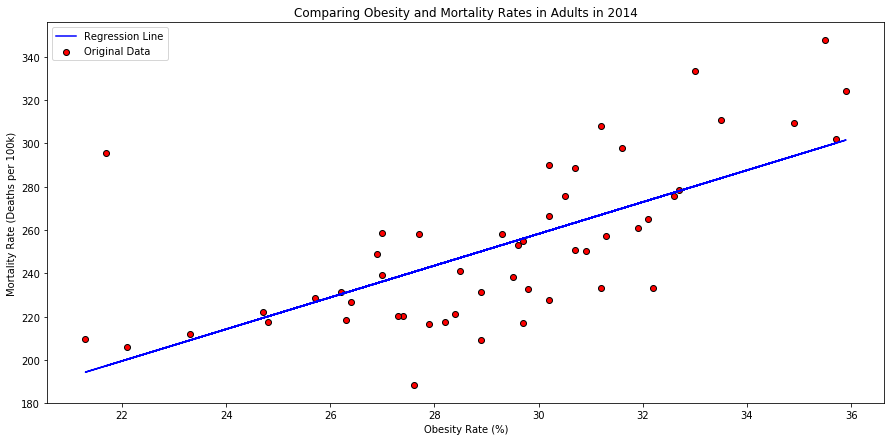

In [18]:
plt.figure(figsize=(15,7))
(slope, intercept, r_value, p_value, std_err) = stats.linregress(z, y)
plt.scatter(z,y,facecolor="r",edgecolor="black",label="Original Data")
plt.plot(z,intercept+slope*z,color="blue",label="Regression Line")
plt.xlabel("Obesity Rate (%)")
plt.ylabel("Mortality Rate (Deaths per 100k)")
plt.title("Comparing Obesity and Mortality Rates in Adults in 2014")
plt.legend()
print("The P-Value is " + str(p_value))
print(str(r_value*r_value))